In [1]:
import sklearn as sk
import pandas
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st

Шаг 1. Читаем данные о погоде из файла Test.csv в таблицу данных:

In [2]:
readdata = pandas.read_csv("Test.csv", sep = ";", encoding = "UTF-8", error_bad_lines = False)
matrixRead = readdata.dropna(axis = 1, how = "all")

Шаг 2. Считаем среднее значение для каждого параметра:

In [3]:
dataLabel = ["T","Po","P","Pa","U","Ff","ff10","ff3","Tn","Tx","VV","Td","tR","Tg"]

print("Считаю вручную:")

dataAverage = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(dataAverage)):
    data = matrixRead[dataLabel[i]]
    dataLength = len(data)
    n = dataLength
    for j in range(dataLength):
        if(data[j] == data[j]):
            dataAverage[i] += data[j]
        else:
            n -= 1
    dataAverage[i] /= n
    print(dataLabel[i], " = ", dataAverage[i])

print()
print("Средние значения параметров:")
matrixRead.mean()

Считаю вручную:
T  =  6.79309873590708
Po  =  746.9656303382286
P  =  760.3258968226861
Pa  =  -0.014329685362517105
U  =  74.8158524086095
Ff  =  1.435941236761189
ff10  =  11.095238095238095
ff3  =  11.094444444444445
Tn  =  3.0419532324621734
Tx  =  10.713461538461534
VV  =  8.919719274221157
Td  =  1.884660061496416
tR  =  12.0
Tg  =  7.133333333333334

Средние значения параметров:


T         6.793099
Po      746.965630
P       760.325897
Pa       -0.014330
U        74.815852
Ff        1.435941
ff10     11.095238
ff3      11.094444
Tn        3.041953
Tx       10.713462
VV        8.919719
Td        1.884660
tR       12.000000
Tg        7.133333
dtype: float64

Шаг 3. Считаем значение дисперсии для каждого параметра:

In [11]:
print("Считаю вручную:")

dataDispersia = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(dataDispersia)) :
    data = matrixRead[dataLabel[i]]
    dataLength = len(data)
    n = dataLength
    for j in range(dataLength):
        if(data[j] == data[j]):
            dataDispersia[i] += (data[j] - dataAverage[i]) * (data[j] - dataAverage[i])
        else:
            n -= 1
    dataDispersia[i] /= (n - 1) 
    print(dataLabel[i], " = ",  dataDispersia[i])

print()
print("Значения дисперсии параметров:")
matrixRead.var()

Считаю вручную:
T  =  86.77371175477263
Po  =  57.904313879708056
P  =  59.84375838032814
Pa  =  1.0893361567510456
U  =  360.24051416549463
Ff  =  1.1523373143857538
ff10  =  0.8904761904761905
ff3  =  1.7172873991309767
Tn  =  60.98516587659769
Tx  =  111.59130589107863
VV  =  6.853912386919135
Td  =  62.21643924701331
tR  =  0.0
Tg  =  30.785964912280694

Значения дисперсии параметров:


T        86.773712
Po       57.904314
P        59.843758
Pa        1.089336
U       360.240514
Ff        1.152337
ff10      0.890476
ff3       1.717287
Tn       60.985166
Tx      111.591306
VV        6.853912
Td       62.216439
tR        0.000000
Tg       30.785965
dtype: float64

Шаг 4. Считаем значение среднеквадратичного отклонения для каждого параметра:

In [12]:
print("Считаю вручную:")

dataSigma = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(dataSigma)) :
    dataSigma[i] = dataDispersia[i] ** 0.5
    print(dataLabel[i] , "=", dataSigma[i])

print()

print("Оценка среднеквадратичного отклонения:")
matrixRead.std()

Считаю вручную:
T = 9.315240831818178
Po = 7.609488411168523
P = 7.735874765036475
Pa = 1.0437126792135112
U = 18.980003007520693
Ff = 1.0734697547605865
ff10 = 0.9436504599035548
ff3 = 1.3104531274070723
Tn = 7.8092999607261655
Tx = 10.563678615476649
VV = 2.6179977820691778
Td = 7.887739805990897
tR = 0.0
Tg = 5.548510152489648

Оценка среднеквадратичного отклонения:


T        9.315241
Po       7.609488
P        7.735875
Pa       1.043713
U       18.980003
Ff       1.073470
ff10     0.943650
ff3      1.310453
Tn       7.809300
Tx      10.563679
VV       2.617998
Td       7.887740
tR       0.000000
Tg       5.548510
dtype: float64

Шаг 5. Строим графики значений параметров в течение года по месяцам. 
Просматриваемые параметры: 
- дистанция видимости до горизонта (км); 
- температура (°С);
- относительная влажность воздуха (%);
- давление (мм рт.ст.).

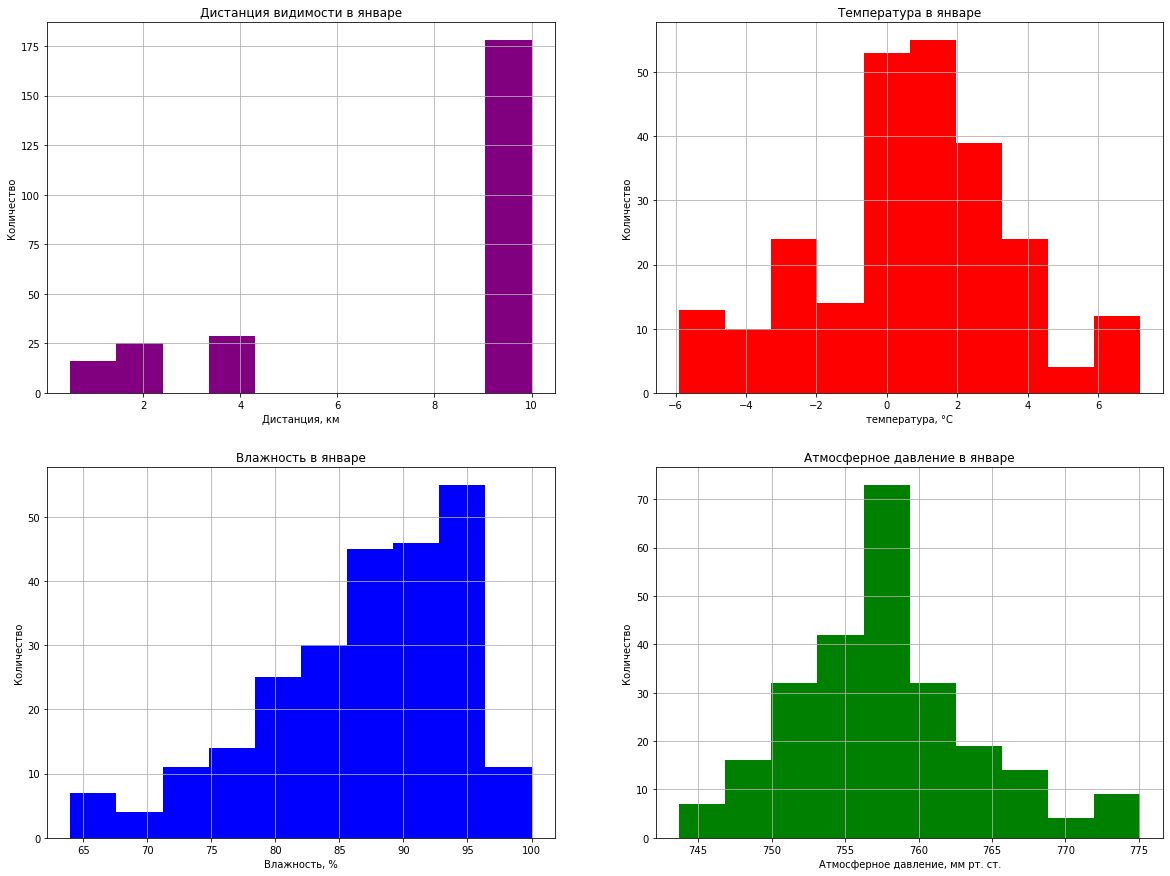

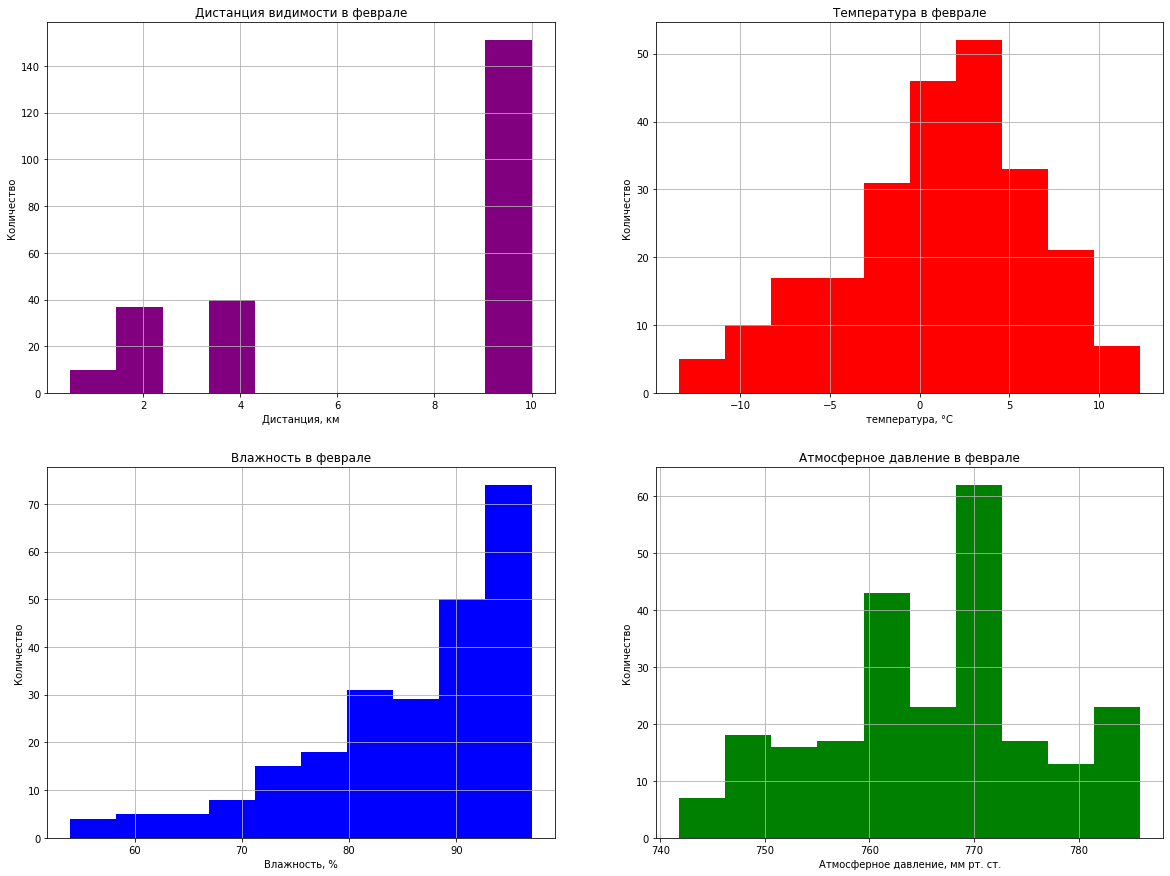

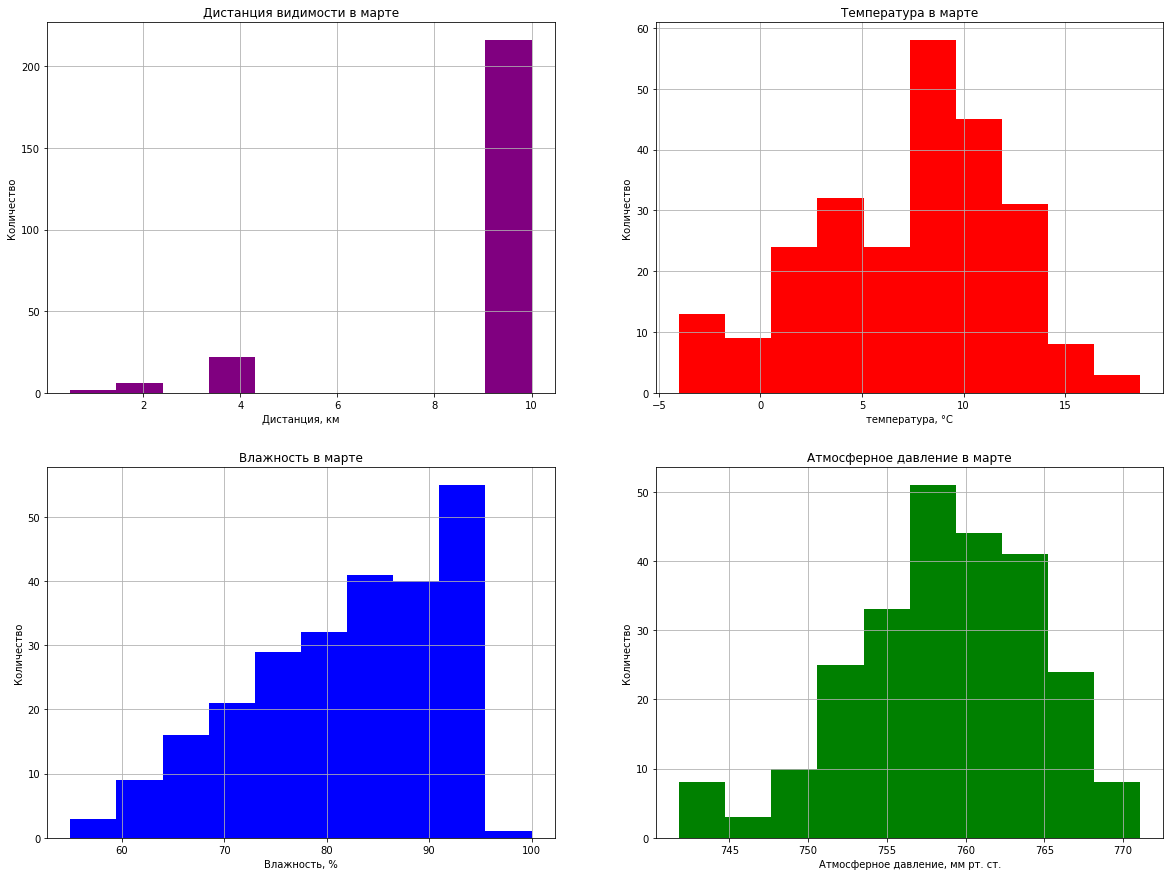

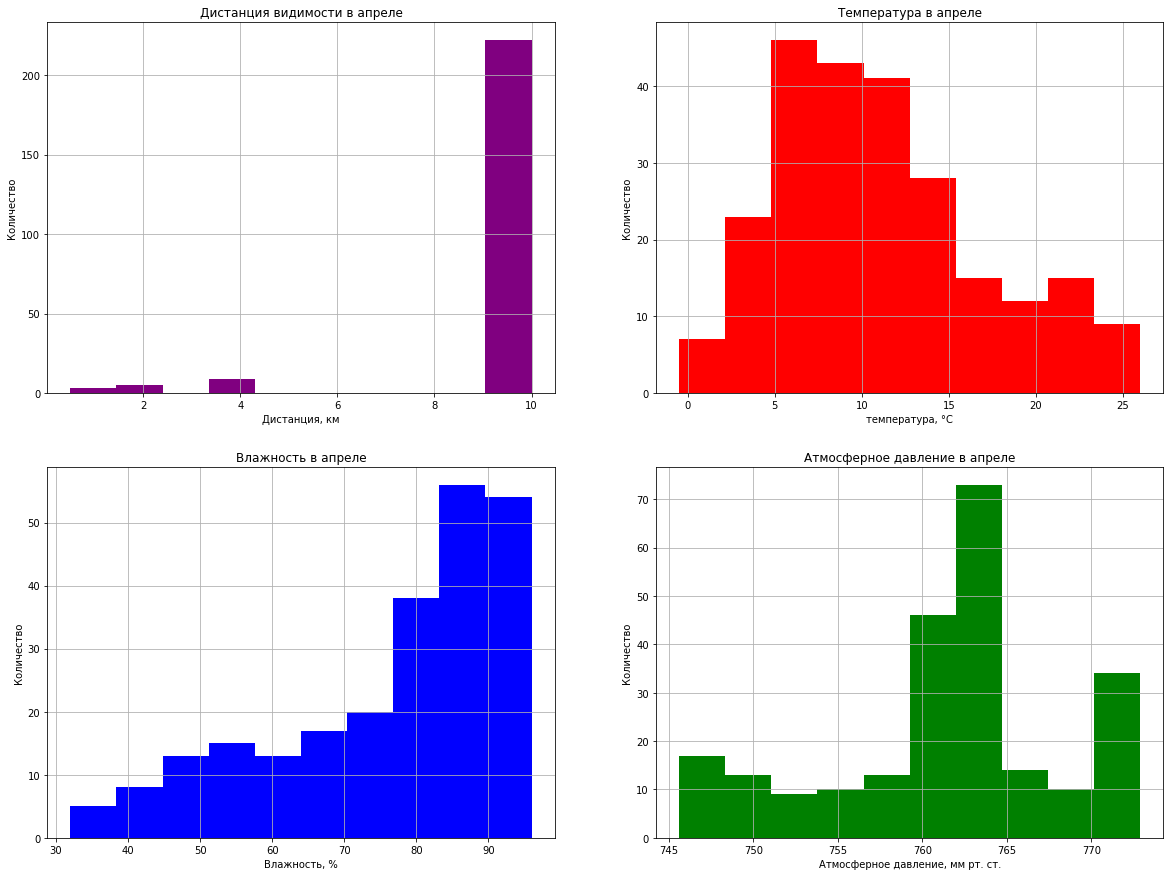

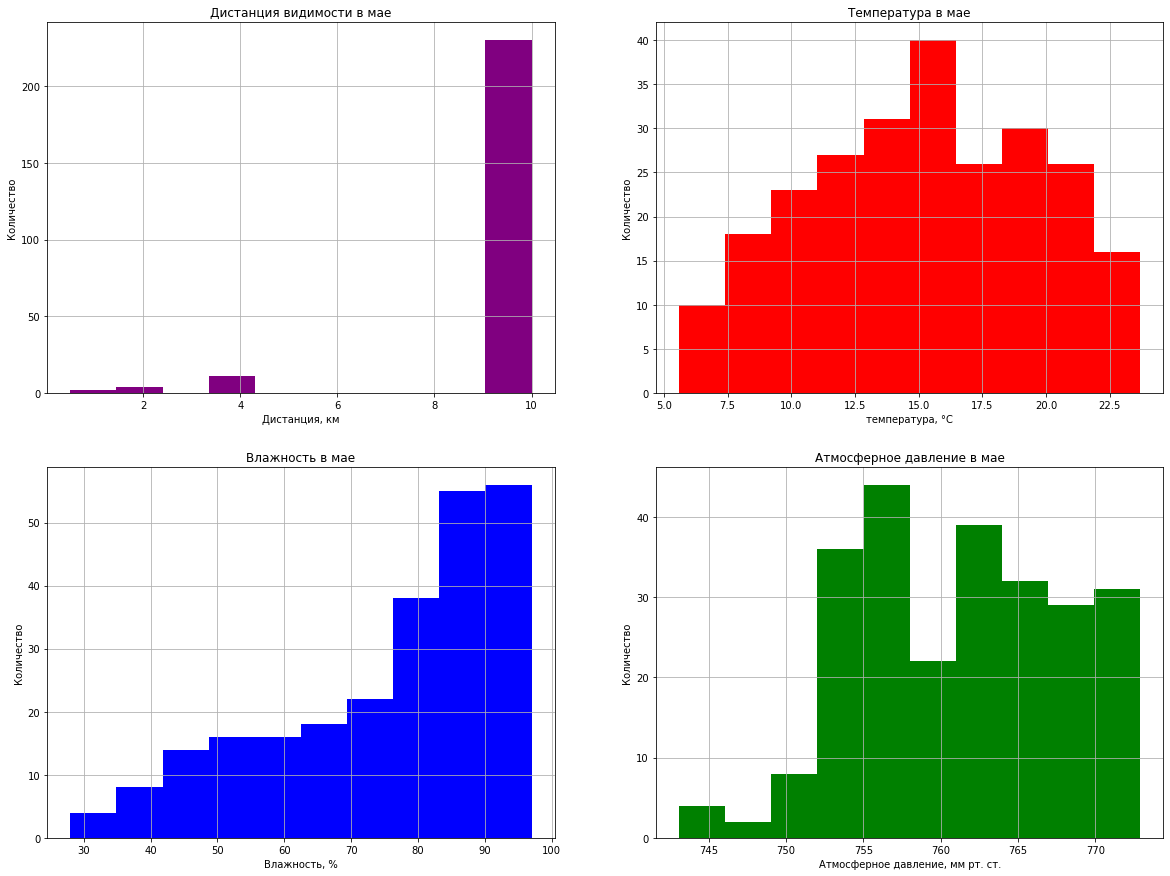

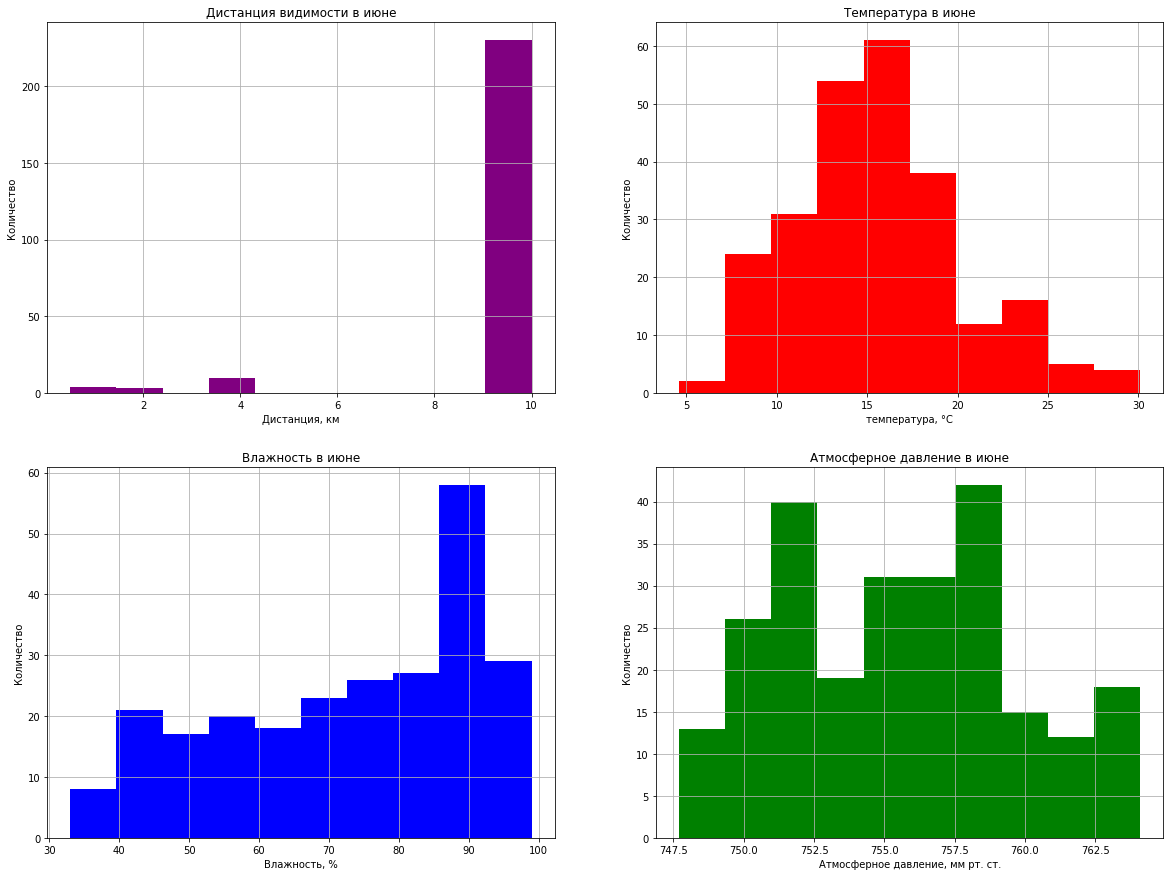

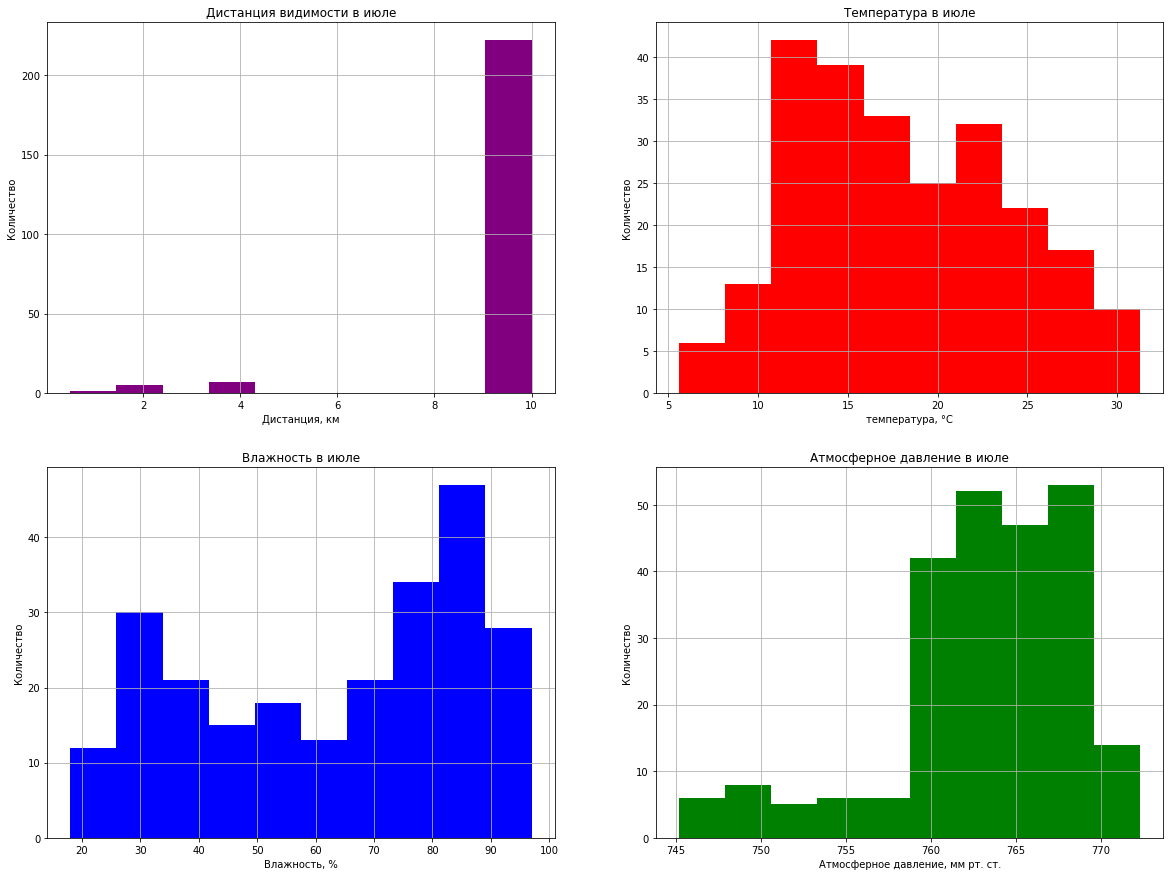

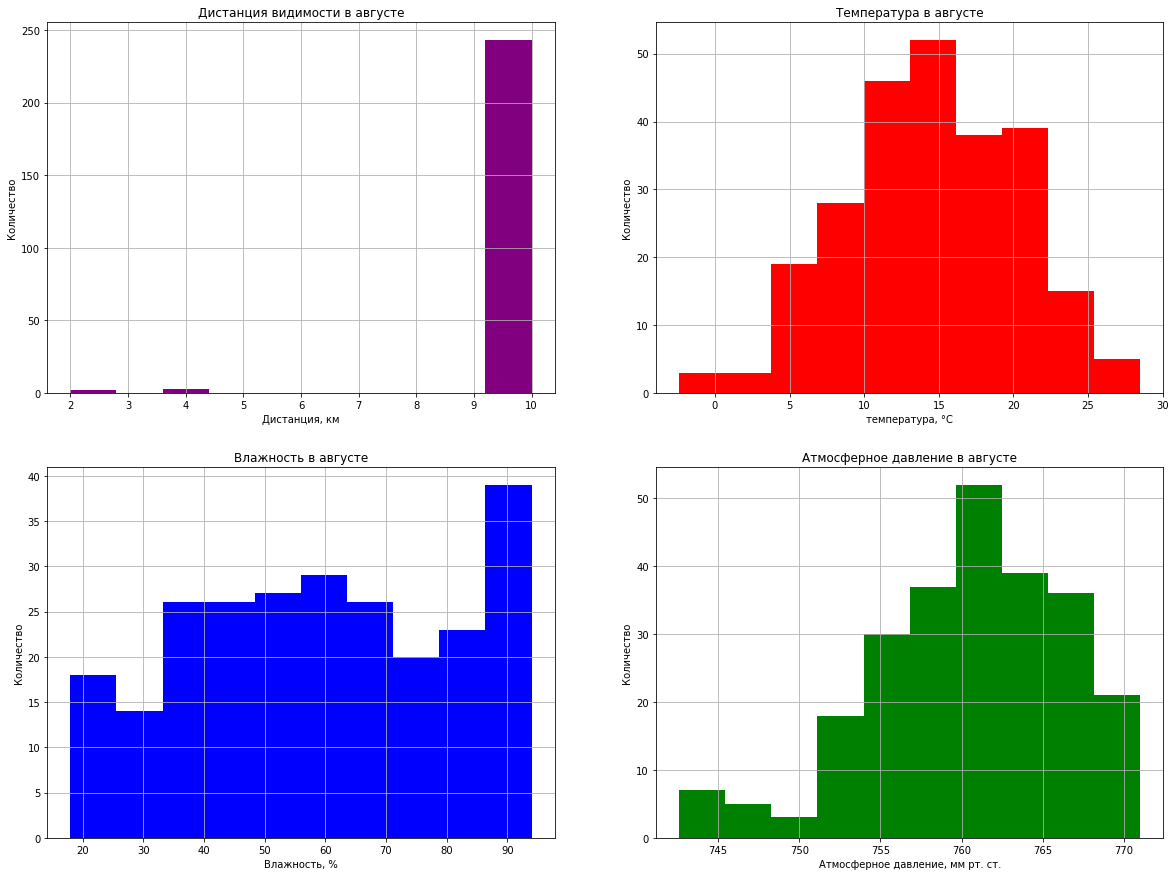

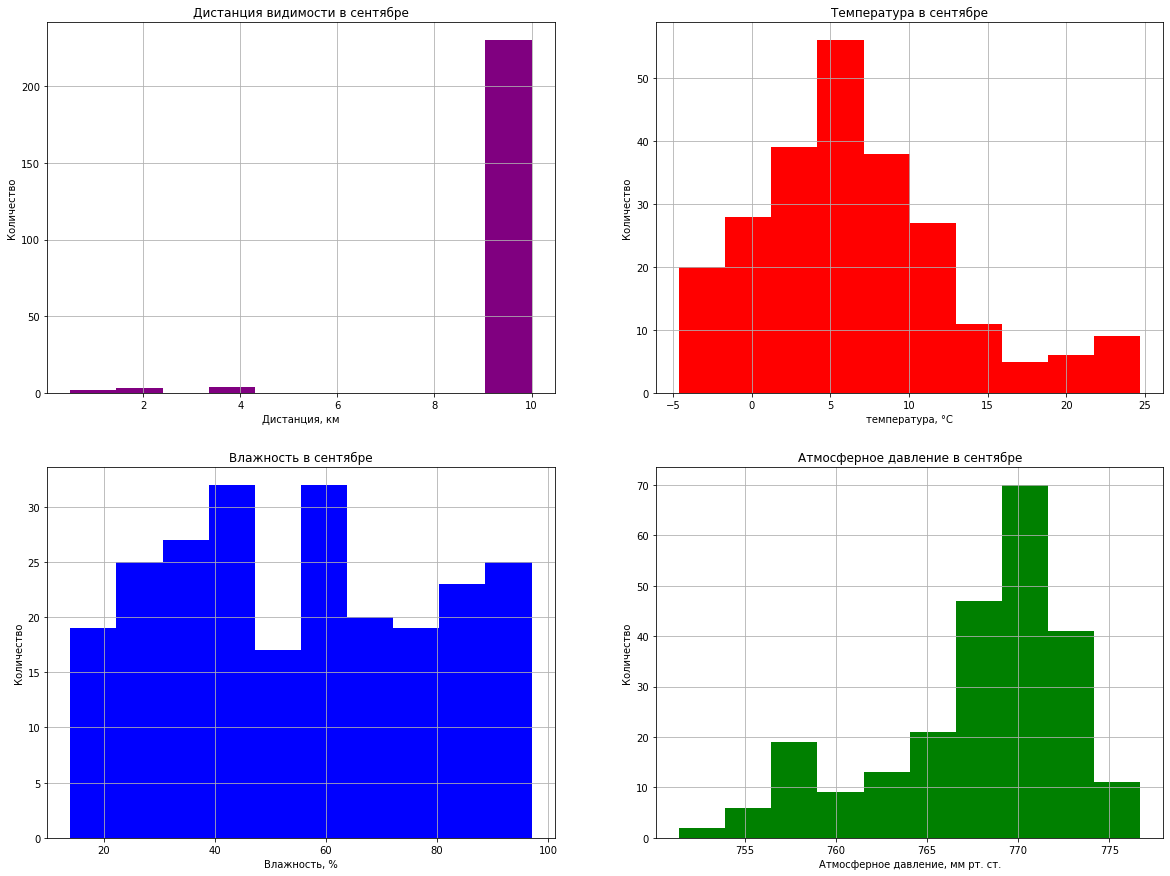

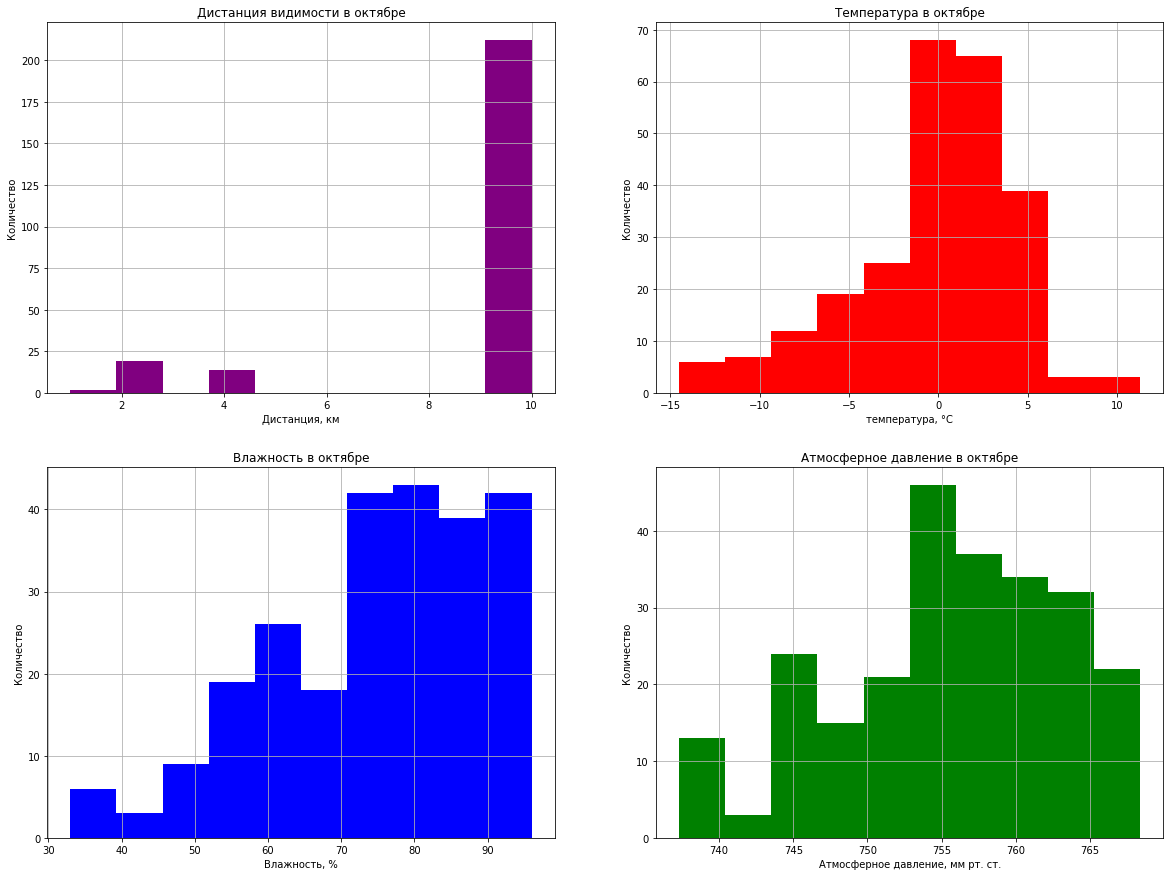

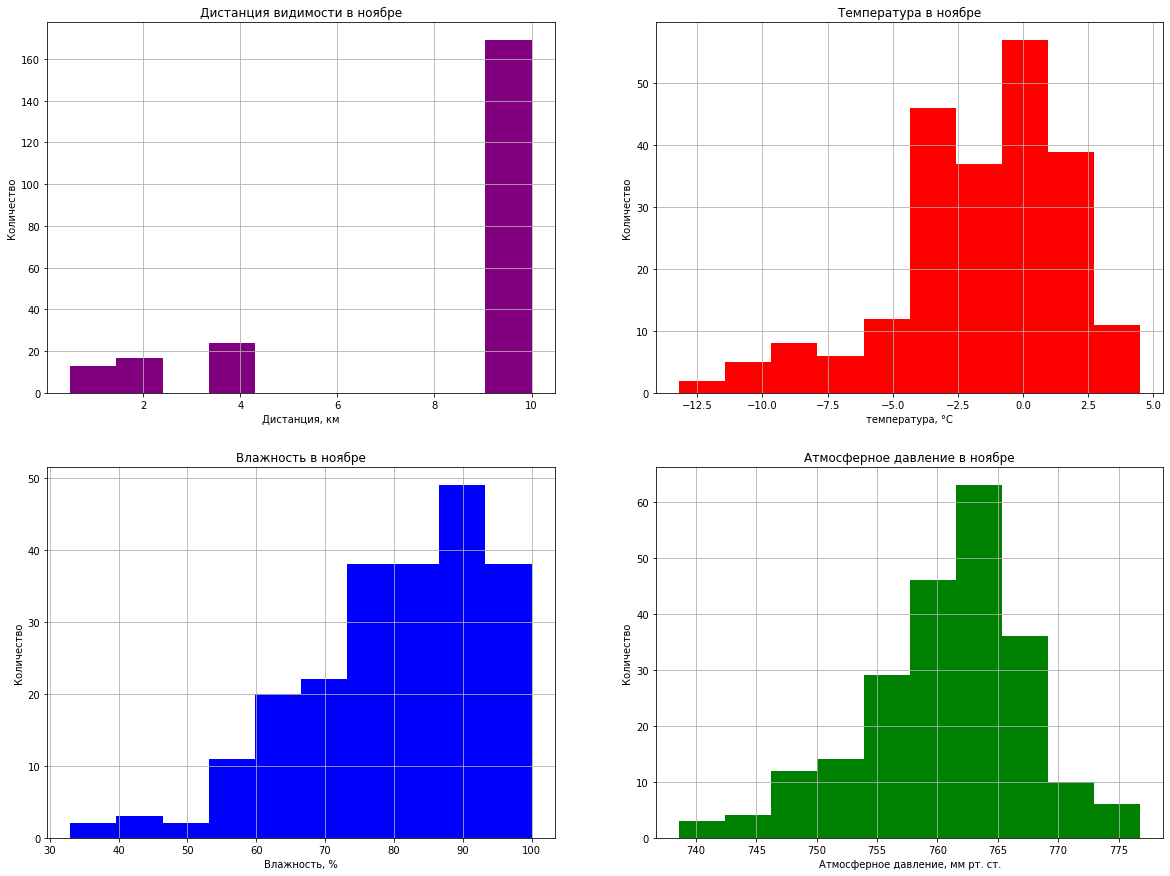

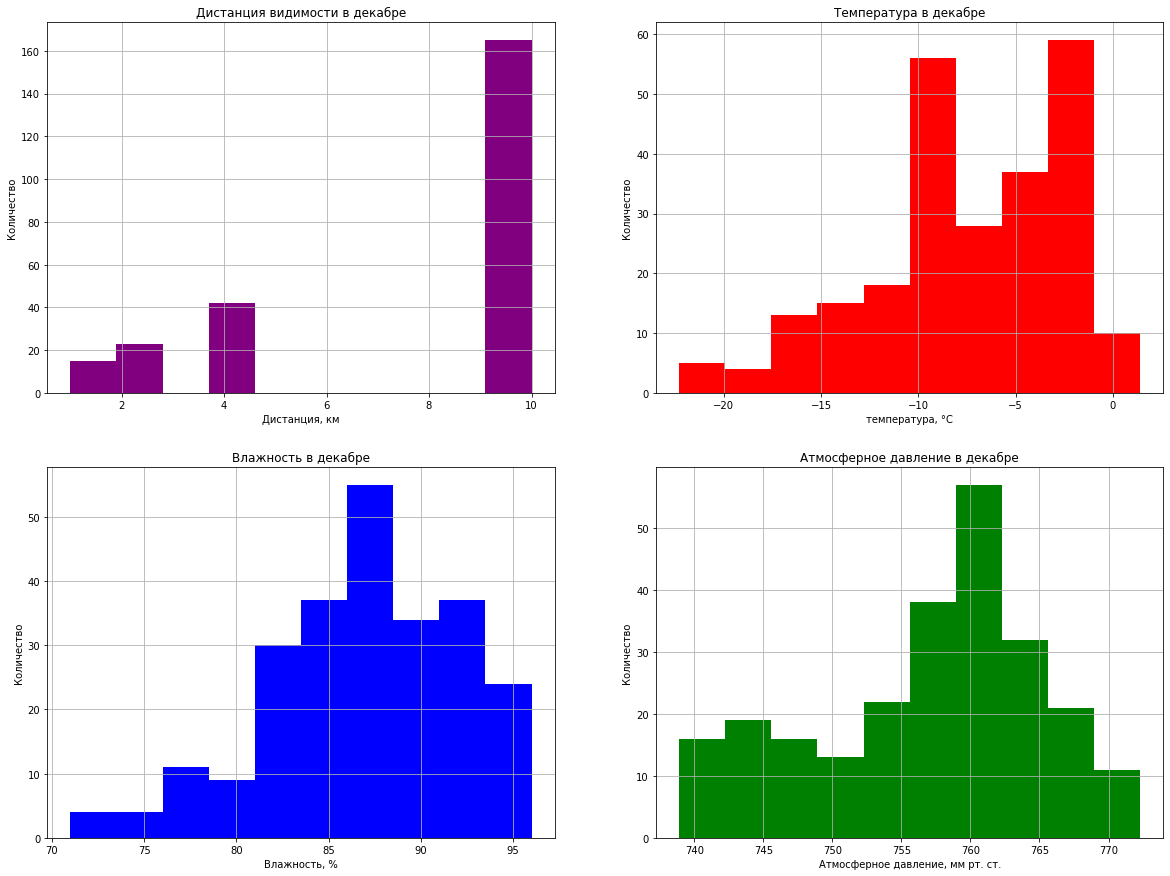

In [6]:
mounthNames = ["январе", "феврале", "марте", "апреле", "мае", "июне", "июле", "августе", "сентябре", "октябре", "ноябре", "декабре"]

dataLocsMin = [9,258,498,746,986,1234,1482,1721,1970,2210,2458,2682]
dataLocsMax = [257,497,745,985,1233,1481,1721,1969,2209,2457,2681,2929]

plotLocs = [1,2,3,4]
plotParameter = ["VV","T","U","P"]
plotParameterTitle = ["Дистанция видимости","Температура","Влажность","Атмосферное давление"]
plotParameterXLabel = ["Дистанция, км","температура, °С","Влажность, %","Атмосферное давление, мм рт. ст."]
plotColors = ["purple","red","blue","green"]

for i in range(len(mounthNames)):
    plt.figure(figsize = (20, 15))
    for j in range(len(plotLocs)):
        plt.subplot(2, 2, plotLocs[j])
        subplt = matrixRead[dataLocsMin[i]:dataLocsMax[i]][plotParameter[j]].hist(color = plotColors[j])
        subplt.set_title(plotParameterTitle[j] + " в "  + mounthNames[i])
        subplt.set_xlabel(plotParameterXLabel[j])
        subplt.set_ylabel("Количество")
    plt.show()

Шаг 6. Рассчитываем коэффициенты корреляции между столбцами. 
Считаем корреляцию относительно температуры и относительной влажности воздуха.

In [7]:
matrixRead.corr()["T"]

T       1.000000
Po      0.061979
P       0.001819
Pa     -0.091818
U      -0.478370
Ff     -0.031600
ff10   -0.125789
ff3    -0.124538
Tn      0.942632
Tx      0.969849
VV      0.205846
Td      0.847275
tR           NaN
Tg      0.777737
Name: T, dtype: float64

In [8]:
matrixRead.corr()["U"]

T      -0.478370
Po     -0.239995
P      -0.213277
Pa      0.048845
U       1.000000
Ff     -0.160411
ff10   -0.088176
ff3    -0.115676
Tn     -0.113665
Tx     -0.400676
VV     -0.368205
Td      0.047840
tR           NaN
Tg      0.153842
Name: U, dtype: float64

Шаг 7. Рассчитываем коэффициенты корреляции между столбцами c влажностью и температурой вручную по формуле:

\begin{align}
r_{xy} = \frac {\sum(d_x * d_y)} {\sqrt{(\sum d_x^2 * \sum d_y^2)}}
\end{align}

In [9]:
import math
import numpy as np

dataHumidity = matrixRead["U"]
dataTemperature = matrixRead["T"]
dataLength = len(dataHumidity)
averageHumidity = 0
averageTemperature = 0

for i in range(dataLength):
    averageHumidity += dataHumidity[i]
    averageTemperature += dataTemperature[i]
    
averageHumidity /= dataLength
averageHumidity = round(averageHumidity, 4)

averageTemperature /= dataLength
averageTemperature = round(averageTemperature, 4)

averageAll = 0
for i in range(dataLength):
    averageAll += (dataHumidity[i] * dataTemperature[i])
averageAll /= dataLength
averageAll = round(averageAll, 4)


dispersionDataHumidity = []
dispersionDataTemperature = []

for i in range(dataLength):
    dispersionDataHumidity.append((averageHumidity - dataHumidity[i]) * (averageHumidity - dataHumidity[i]))
    dispersionDataTemperature.append((averageTemperature - dataTemperature[i]) * (averageTemperature - dataTemperature[i]))

averageSqrtHumidity = math.sqrt(sum(dispersionDataHumidity) / dataLength)
averageSqrtHumidity = round(averageSqrtHumidity, 4)
averageSqrtTemperature = math.sqrt(sum(dispersionDataTemperature) / dataLength)
averageSqrtTemperature = round(averageSqrtTemperature, 4)

totalCorrilation = (averageAll - averageHumidity * averageTemperature) / (averageSqrtHumidity * averageSqrtTemperature)
totalCorrilation = round(totalCorrilation, 4)

print("Вычисляем корреляцию между влажностью воздуха и температурой")
print("Коэффициент корреляции, вычисленный вручную: ", totalCorrilation)
print("Коэффициент корреляции, вычисленный с помощью pandas: ", matrixRead.corr()["U"]["T"])

dataHumidity = matrixRead["U"]
dataTemperature = matrixRead["P"]
dataLength = len(dataHumidity)
averageHumidity = 0
averageTemperature = 0

for i in range(dataLength):
    averageHumidity += dataHumidity[i]
    averageTemperature += dataTemperature[i]
    
averageHumidity /= dataLength
averageHumidity = round(averageHumidity, 4)

averageTemperature /= dataLength
averageTemperature = round(averageTemperature, 4)

averageAll = 0
for i in range(dataLength):
    averageAll += (dataHumidity[i] * dataTemperature[i])
averageAll /= dataLength
averageAll = round(averageAll, 4)


dispersionDataHumidity = []
dispersionDataTemperature = []

for i in range(dataLength):
    dispersionDataHumidity.append((averageHumidity - dataHumidity[i]) * (averageHumidity - dataHumidity[i]))
    dispersionDataTemperature.append((averageTemperature - dataTemperature[i]) * (averageTemperature - dataTemperature[i]))

averageSqrtHumidity = math.sqrt(sum(dispersionDataHumidity) / dataLength)
averageSqrtHumidity = round(averageSqrtHumidity, 4)
averageSqrtTemperature = math.sqrt(sum(dispersionDataTemperature) / dataLength)
averageSqrtTemperature = round(averageSqrtTemperature, 4)

totalCorrilation = (averageAll - averageHumidity * averageTemperature) / (averageSqrtHumidity * averageSqrtTemperature)
totalCorrilation = round(totalCorrilation, 4)

print("Вычисляем корреляцию между влажностью воздуха и давлением")
print("Коэффициент корреляции, вычисленный вручную: ", totalCorrilation)
print("Коэффициент корреляции, вычисленный с помощью pandas: ", matrixRead.corr()["U"]["P"])

Вычисляем корреляцию между влажностью воздуха и температурой
Коэффициент корреляции, вычисленный вручную:  -0.4784
Коэффициент корреляции, вычисленный с помощью pandas:  -0.4783701247081933
Вычисляем корреляцию между влажностью воздуха и давлением
Коэффициент корреляции, вычисленный вручную:  -0.2135
Коэффициент корреляции, вычисленный с помощью pandas:  -0.21327727512485728


ШАГ 8. Вычислим доверительные интервалы:

In [15]:
import numpy as np, scipy.stats as st
import math

print("Расчёт с помощью библиотек:")
    
confidence = 0.95
half = confidence/2
laplas = 0
accurate = 3
reverselaplas = 0;
add = 1

for i in range(accurate):
    while laplas < half:
        reverselaplas += add
        laplas = st.norm.cdf(reverselaplas) - 0.5
    if(i < accurate-1):
        reverselaplas -= add
        laplas = 0
        add *= 0.1
        
for i in range(14):
    anan = np.array(matrixRead[dataLabel[i]])
    nnan = len(anan)
    a = []
    n = 0
    for j in range(nnan):
        if(anan[j] == anan[j]):
            a.append(anan[j])
            n += 1
    print(dataLabel[i] , " = " , st.t.interval(confidence, len(a)-1, loc=np.mean(a), scale=st.sem(a))) 
    
       
print()

print("Расчёт вручную:")
for i in range(14):
    anan = np.array(matrixRead[dataLabel[i]])
    nnan = len(anan)
    a = []
    n = 0
    for j in range(nnan):
        if(anan[j] == anan[j]):
            a.append(anan[j])
            n += 1
            
    sigma = dataSigma[i] 
    average = dataAverage[i]
    n = n ** 0.5
    z = reverselaplas
    print(dataLabel[i] , " = " , average - (z * sigma) / n, " - ",average + (z * sigma) / n)
    

Расчёт с помощью библиотек:
T  =  (6.455492466685078, 7.130705005129068)
Po  =  (746.6898445545274, 747.241416121933)
P  =  (760.0455304998233, 760.6062631455476)
Pa  =  (-0.05217570725121944, 0.02351633652618524)
U  =  (74.12797239338711, 75.50373242383189)
Ff  =  (1.3970361643566749, 1.4748463091657031)
ff10  =  (10.665693555794675, 11.524782634681515)
ff3  =  (10.901701028835566, 11.287187860053324)
Tn  =  (2.4733391441724386, 3.6105673207519065)
Tx  =  (9.624624220170798, 11.802298856752277)
VV  =  (8.824739388742008, 9.014699159700305)
Td  =  (1.5987897918412752, 2.17053033115155)
tR  =  (nan, nan)
Tg  =  (6.378524515070284, 7.888142151596384)

Расчёт вручную:
T  =  6.455625918250557  -  7.130571553563603
Po  =  746.6899535692212  -  747.241307107236
P  =  760.0456413251495  -  760.6061523202227
Pa  =  -0.052160731120978535  -  0.02350136039594433
U  =  74.12824430381431  -  75.50346051340469
Ff  =  1.397051543048632  -  1.474830930473746
ff10  =  10.691632126776554  -  11.4988440